In [40]:
from tensorflow import keras
import matplotlib.pyplot as plt
from numpy import load

In [41]:
model =  keras.models.load_model("model-files")

In [42]:
from numpy import load
activations = {}
layer_names = ["conv2d_13", "conv2d_14"]
for layer_name in layer_names:
    activations[layer_name] = load("activation-files/activations_" + layer_name +'.npz')


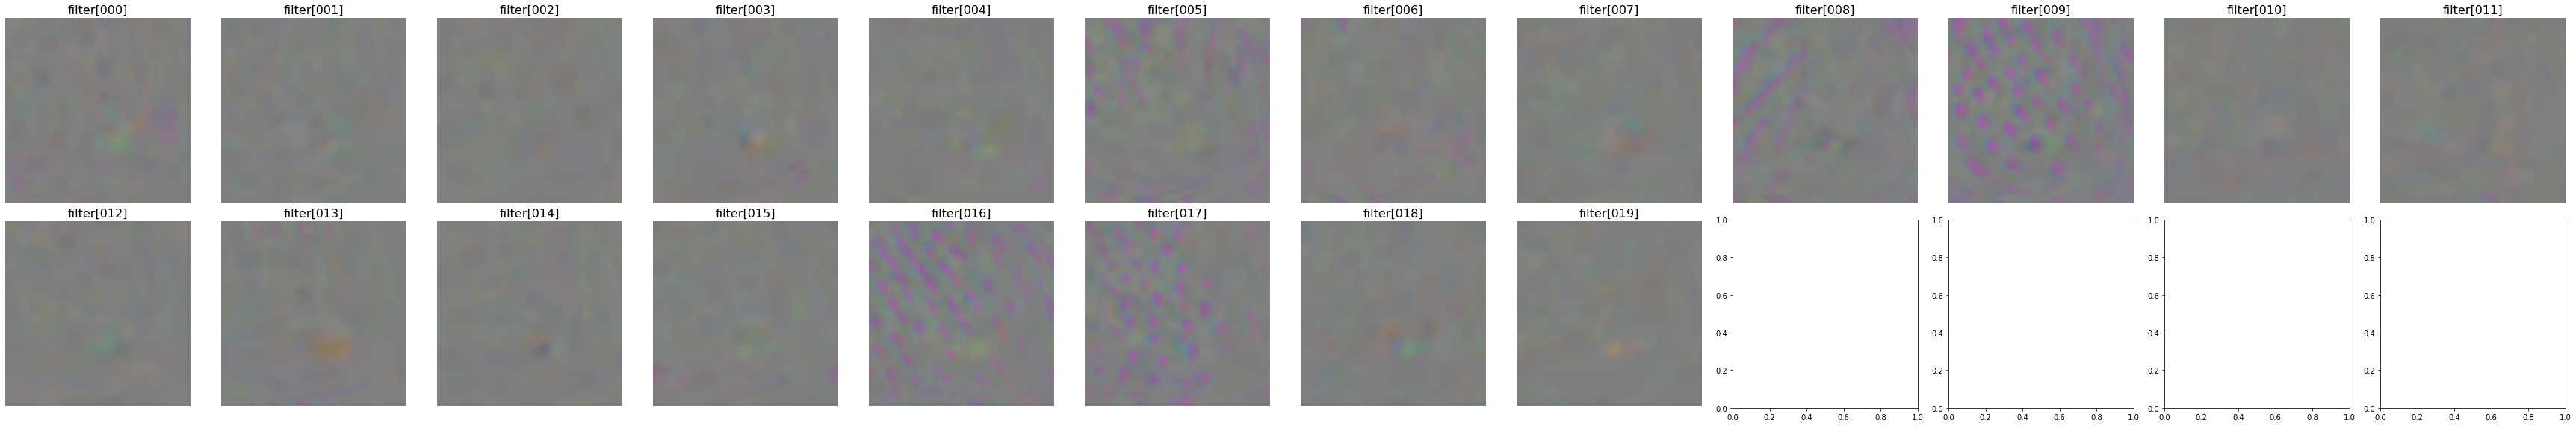

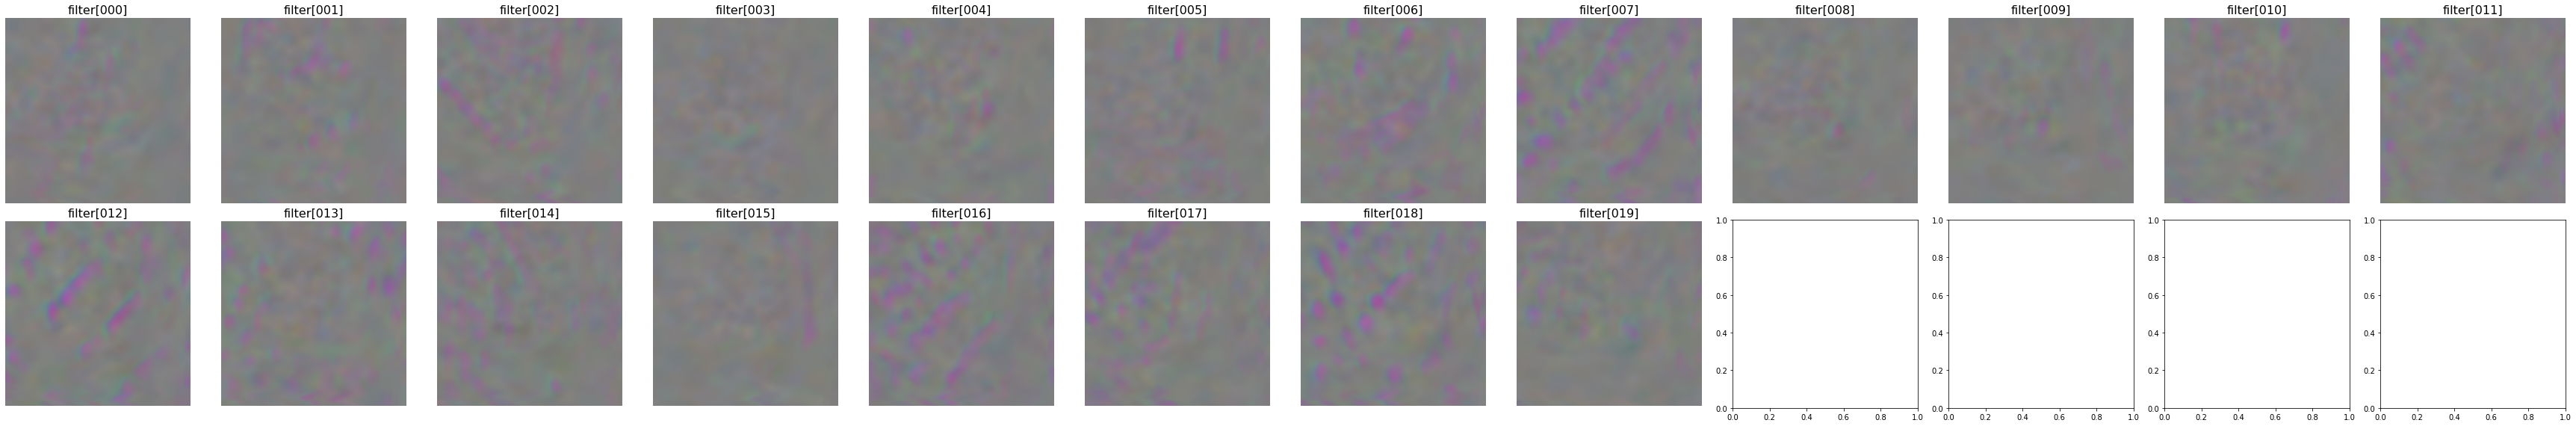

In [43]:
max_filters = 20
for layer_name in layer_names:
    n_filters = min(model.get_layer(layer_name).filters, max_filters )
    filters_per_line = 12
    nrows = n_filters//filters_per_line + 1
    ncols = filters_per_line 

    f, ax = plt.subplots(nrows= nrows, ncols = ncols , figsize=(4*ncols, 4*nrows))
    filter_number = 0
    for x in range(nrows):
        if (x == nrows - 1):
            a = n_filters%filters_per_line
        else:
            a = filters_per_line
        for y in range(a): 
            ax[x][y].set_title('filter[{:03d}]'.format(filter_number), fontsize=16)
            ax[x][y].imshow(activations[layer_name]["arr_0"][filter_number])
            ax[x][y].axis('off')

            filter_number = filter_number + 1

    plt.tight_layout()
    plt.show()

In [44]:
from numpy import load
activations["dense"] = load("activation-files/activations_dense.npz")
activations["dense"] = activations["dense"]["arr_0"]

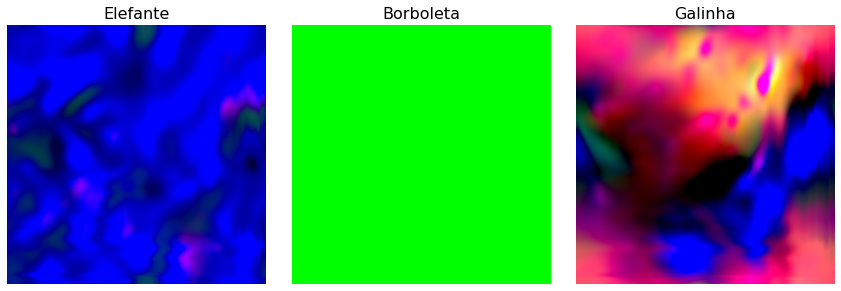

In [45]:
image_titles = ["Elefante", "Borboleta", "Galinha"] #CORRIGIR
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(activations["dense"][i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()